In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# vectorized error calc
def rmsle(y, y0):
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))

In [4]:
df = pd.read_csv("Housing_prices.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Important variables
#MSSubClass: The building class, this identifies the type of dwelling involved in the sale.
#MSZoning:  Identifies the general zoning classification of the sale.
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet
#Street: Type of road access to property, Gravel and Paved
#Alley: Type of alley access to property Grvl    Gravel: Pave    Paved: NA     No alley access
#LotShape: General shape of property
#LandContour: Flatness of the property
#Neighbourhood: Physical locations within Ames city limits
#OverallCond: Rates the overall condition of the house 10(best) to 1(worse)
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [7]:
df.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,NaN,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,NaN,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,NaN,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [9]:
df.groupby(df.Neighborhood)[["SalePrice"]].mean()

,SalePrice
Neighborhood,
Blmngtn,194870
Blueste,137500
BrDale,104493
BrkSide,124834
ClearCr,212565
CollgCr,197965
Crawfor,210624
Edwards,128219
Gilbert,192854


In [10]:
df.groupby(df.Street)[["SalePrice"]].median()

,SalePrice
Street,
Grvl,114250
Pave,163000


In [11]:
df_y_s = df.groupby(df.YearRemodAdd)[["SalePrice"]].median()

In [12]:
df_y_s.head()

,SalePrice
YearRemodAdd,
1950,115000
1951,138450
1952,123500
1953,152250
1954,118500


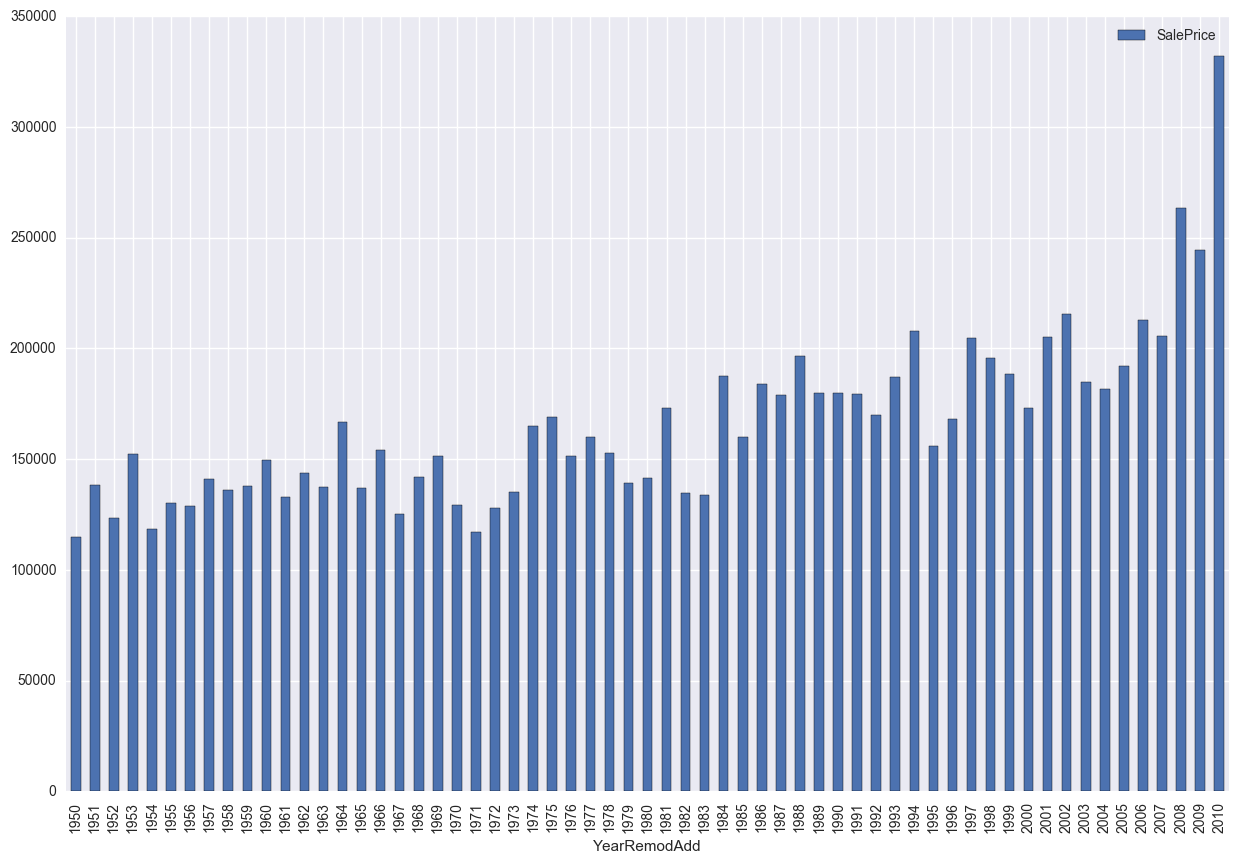

In [13]:
#, as_index=False    x=df_y_s["YearRemodAdd"],
df_y_s.plot(kind = "bar", stacked = True, figsize=(15,10))

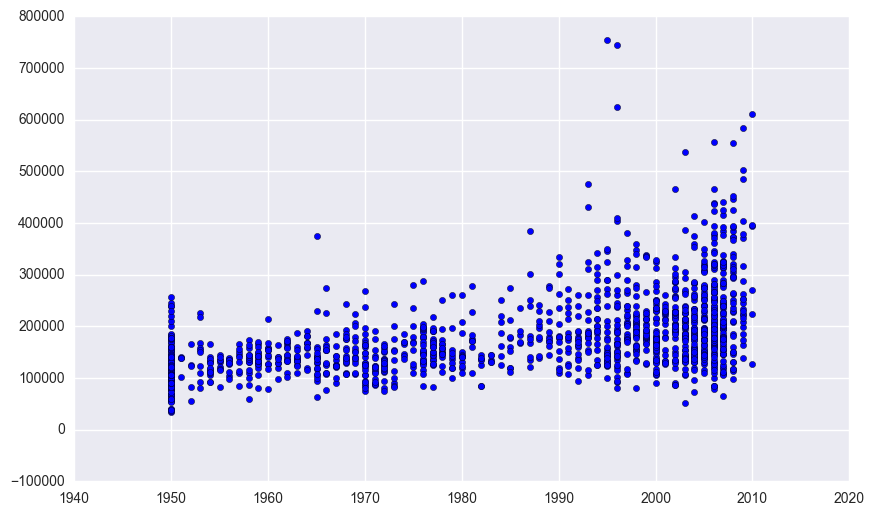

In [14]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(df.YearRemodAdd, df.SalePrice)

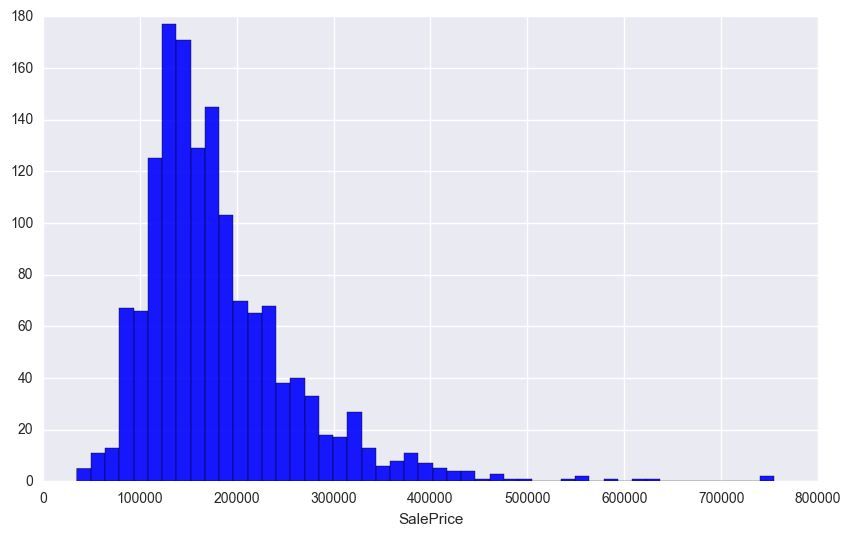

In [15]:
sns.distplot(df['SalePrice'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [16]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

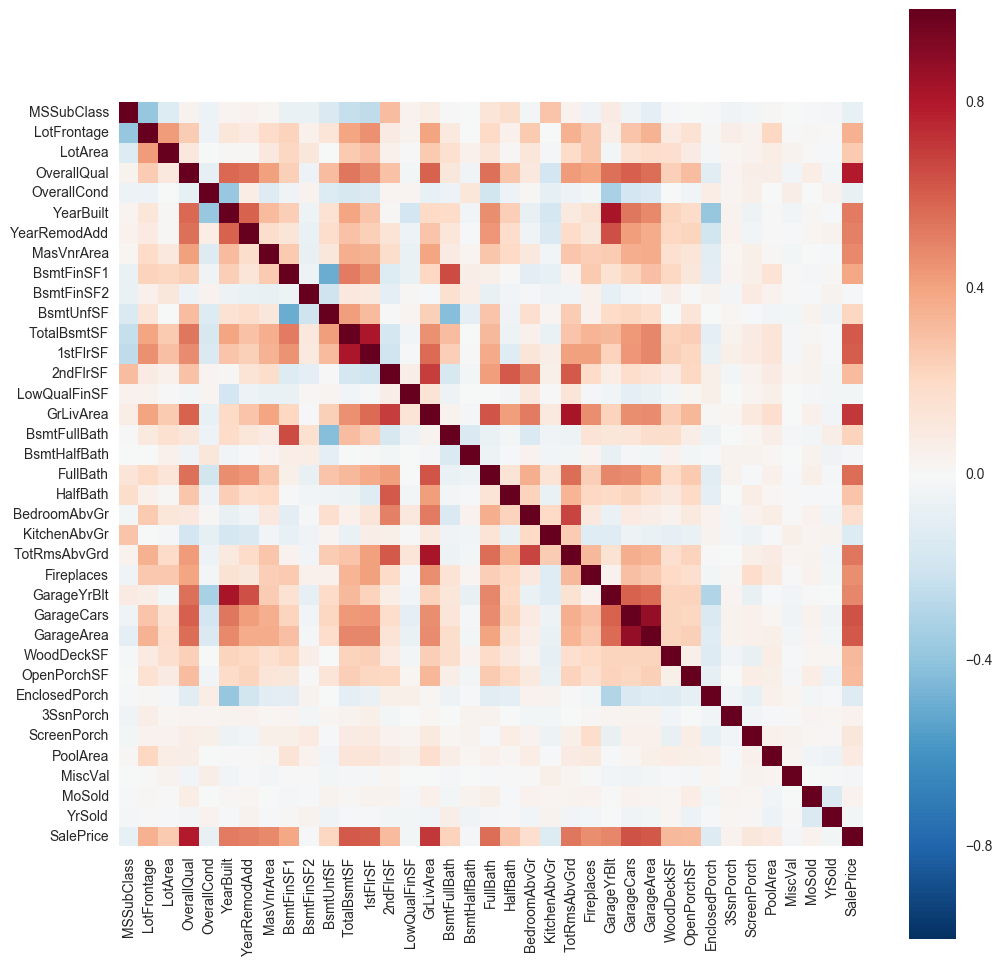

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [18]:
#Read in the inflation data
df_CPI = pd.read_csv("CPI_US.csv", parse_dates=['DATE'])

In [19]:
df_CPI.head()

,DATE,VALUE
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [20]:
#Verify that thedate has been read correctly
type(df_CPI.DATE[1])

pandas.tslib.Timestamp

In [21]:
#Group the CPI values by year and their mean
CPI_Mean = df_CPI.groupby(df_CPI['DATE'].map(lambda x: x.year)).mean()

In [22]:
CPI_Mean.head()

,VALUE
DATE,
1947,22.331667
1948,24.045000
1949,23.809167
1950,24.062500
1951,25.973333


In [23]:
CPI_Mean.VALUE[1947]

22.331666666666667

In [24]:
#Make a nelumn in the main table and add an adjust inflation prize
df["Inf_adj"] = df.apply(lambda x: x["SalePrice"]*CPI_Mean.VALUE[2010]/CPI_Mean.VALUE[x["YrSold"]], axis=1)
#df["SalePrice"]*CPI_Mean.VALUE[df["YrSold"]]/CPI_Mean.VALUE[2010]

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Inf_adj
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,211233.370537
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,190894.322644
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,226430.015900
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,151473.088849
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,253277.422707


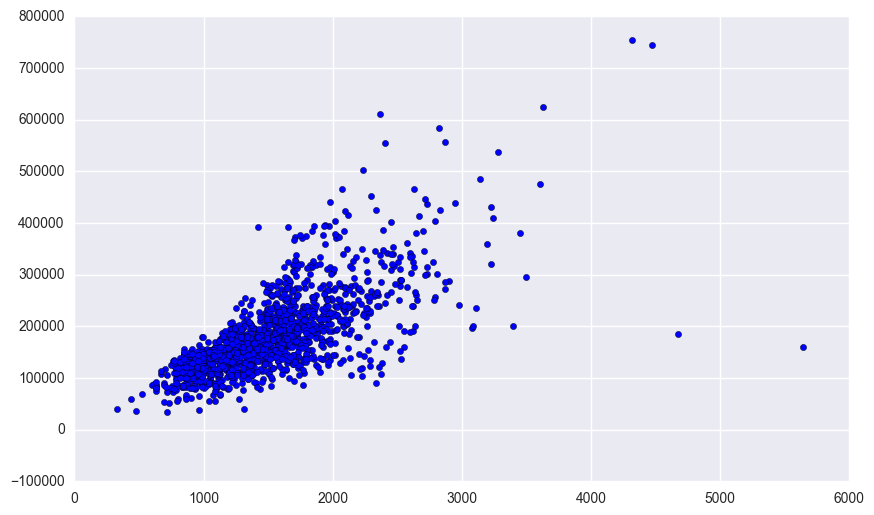

In [26]:
plt.scatter(df.GrLivArea, df.SalePrice)

In [27]:
#The parameteres for the fitting model
parameters = ["YearRemodAdd", "LotArea", "OverallQual", "GrLivArea", "FullBath", "GarageCars"]

#Initialiaze the fit function
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [28]:
#Get the KFold cross-validation
from sklearn.cross_validation import KFold

# Generate the cross-validation fold for the train and test set
kf = KFold(df.shape[0], n_folds=5, random_state=1)

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = (df[parameters].iloc[train,:])
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(df[parameters].iloc[test,:])
    predictions.append(test_predictions)

In [29]:
import numpy as np

#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [30]:
predictions

array([ 221875.54087486,  165579.99339977,  227474.19610131, ...,
        241194.50824528,  125410.63053822,  120168.4068921 ])

In [31]:
rmsle(df["SalePrice"], predictions)

0.22177877250253708

In [33]:
#Assign a number to the living area
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [34]:
Neighborhood = df["Neighborhood"]
print(pd.value_counts(Neighborhood))

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [35]:
#Map each title to an integer
Neighborhood_mapping = {"CollgCr": 1, "Veenker": 2, "Crawfor":3, "NoRidge":4, "Mitchel":5, "Somerst":6, "NWAmes":7, 
                        "OldTown":8, "BrkSide":9, "Sawyer":10, "NridgHt":11, "NAmes":12, "SawyerW":13, 
                        "IDOTRR":14, "MeadowV":15, "Edwards":16, "Timber":17, "Gilbert":18, "StoneBr":19, 
                        "ClearCr":20, "NPkVill":21, "Blmngtn":22, "BrDale":23, "SWISU":24, "Blueste":25}

for k,v in Neighborhood_mapping.items():
    Neighborhood[Neighborhood == k] = v
    
#Verify that everything was converted
print(pd.value_counts(Neighborhood))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12    225
1     150
8     113
16    100
6      86
18     79
11     77
10     74
7      73
13     59
9      58
3      51
5      49
4      41
17     38
14     37
20     28
24     25
19     25
15     17
22     17
23     16
2      11
21      9
25      2
Name: Neighborhood, dtype: int64


In [36]:
df["Neighborhood_id"] = Neighborhood

In [37]:
len(list(df))

83

In [38]:
#The parameteres for the fitting model
parameters = ["YearRemodAdd", "LotArea", "OverallQual", "GrLivArea", "FullBath", "GarageCars", "BedroomAbvGr", 
              "Neighborhood_id"]

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = (df[parameters].iloc[train,:])
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(df[parameters].iloc[test,:])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

"""error = predictions - df["SalePrice"]

X = np.array(error)

np.dot(X,X)"""

rmsle(df["SalePrice"], predictions)

0.2204565788843858

In [39]:
#The parameteres for the fitting model
parameters = ["LotArea", "OverallQual", "GrLivArea", "FullBath", "GarageCars", "BedroomAbvGr", 
              "Neighborhood_id"]

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = (df[parameters].iloc[train,:])
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(df[parameters].iloc[test,:])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

"""error = predictions - df["SalePrice"]

X = np.array(error)

np.dot(X,X)"""

rmsle(df["SalePrice"], predictions)

0.22108467365207032

In [40]:
#Assign a number to the sale condition
df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype=object)

In [41]:
SaleCondition = df["SaleCondition"]

#Map each title to an integer
SaleCondition_mapping = {"Normal": 1, "Abnorml": 2, "Partial":3, "AdjLand":4, "Alloca":5, "Family":6}

for k,v in SaleCondition_mapping.items():
    SaleCondition[SaleCondition == k] = v
    
#Verify that everything was converted
print(pd.value_counts(SaleCondition))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1    1198
3     125
2     101
6      20
5      12
4       4
Name: SaleCondition, dtype: int64


In [42]:
df["SaleCondition_id"] = SaleCondition

In [43]:
#The parameteres for the fitting model
parameters = ["YearRemodAdd", "LotArea", "OverallQual", "GrLivArea", "FullBath", "GarageCars", "BedroomAbvGr", 
              "Neighborhood_id", "SaleCondition_id"]

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = (df[parameters].iloc[train,:])
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(df[parameters].iloc[test,:])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

"""error = predictions - df["SalePrice"]

X = np.array(error)

np.dot(X,X)"""

rmsle(df["SalePrice"], predictions)

0.22098548864663717

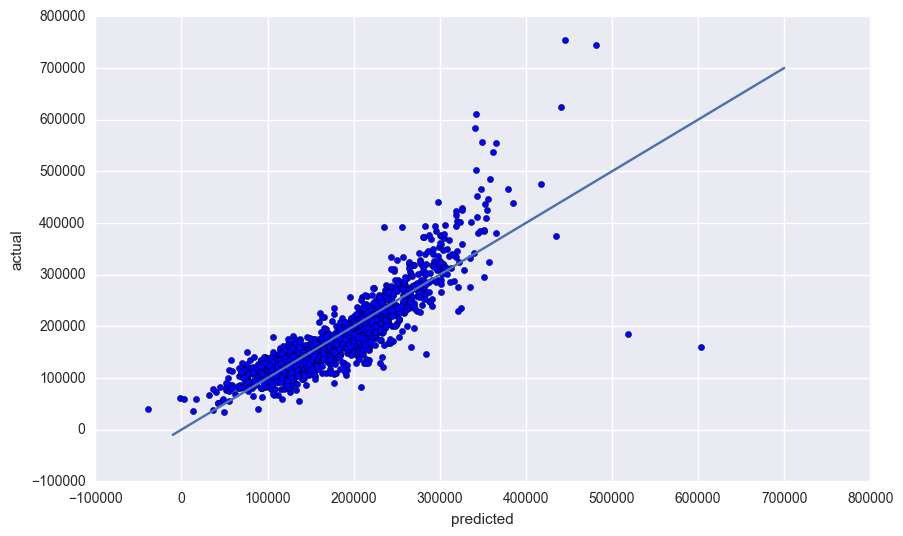

In [44]:
plt.xlabel("predicted")
plt.ylabel("actual")
plt.scatter(predictions, df.SalePrice)
x=np.linspace(-10000, 700000, 10)
plt.plot(x, x)

In [46]:
#Plot the residual against the predictors
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

'for parameter in parameters:\n    plt.scatter(df[parameter], error)\n    plt.xlabel(parameter)\n    plt.show()'

In [47]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [  4.21358396e+02   8.84963307e-01   2.20409061e+04   6.68145043e+01
  -2.25606462e+03   1.56656923e+04  -1.09262610e+04  -3.41679090e+02
   2.56673150e+03]


In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

#get the new prameters
X_poly = poly.fit_transform(df[parameters])

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = X_poly[train]
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(X_poly[test])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [49]:
rmsle(df["SalePrice"], predictions)

0.26515735520922373

In [52]:
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

'for parameter in parameters:\n    plt.scatter(df[parameter], error)\n    plt.xlabel(parameter)\n    plt.show()'

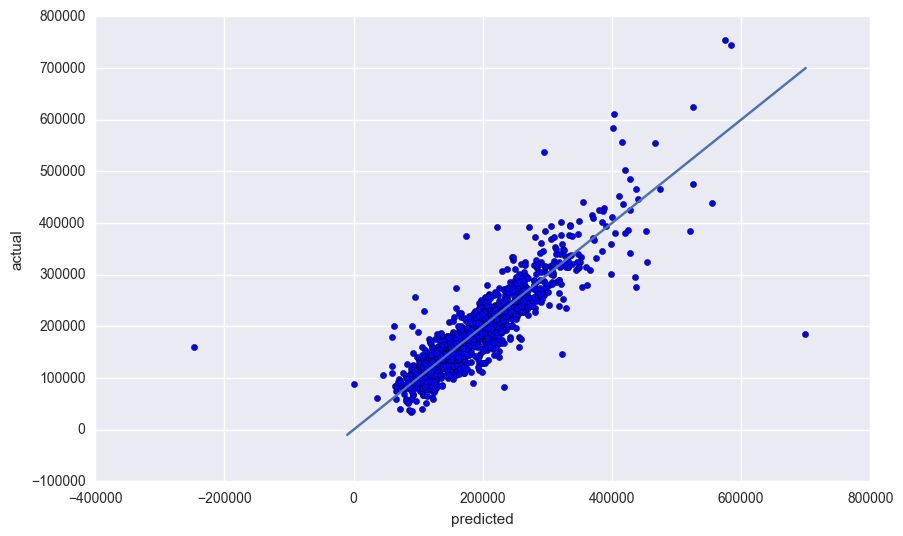

In [53]:
plt.xlabel("predicted")
plt.ylabel("actual")
plt.scatter(predictions, df.SalePrice)
x=np.linspace(-10000, 700000, 10)
plt.plot(x, x)

In [54]:
#Use lot areas log
from math import log
df["LotArea_log"] = df.apply(lambda x: log(x["LotArea"]), axis=1)

In [79]:
#The parameteres for the fitting model
parameters = ["YearRemodAdd", "LotArea_log", "OverallQual", "GrLivArea", "FullBath", "GarageCars", "BedroomAbvGr", 
              "Neighborhood_id", "SaleCondition_id", "YearBuilt"]

poly = PolynomialFeatures(degree=2)

#get the new prameters
X_poly = poly.fit_transform(df[parameters])

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = X_poly[train]
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(X_poly[test])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [80]:
rmsle(df["SalePrice"], predictions)

0.1844069924360224

In [57]:
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

'for parameter in parameters:\n    plt.scatter(df[parameter], error)\n    plt.xlabel(parameter)\n    plt.show()'

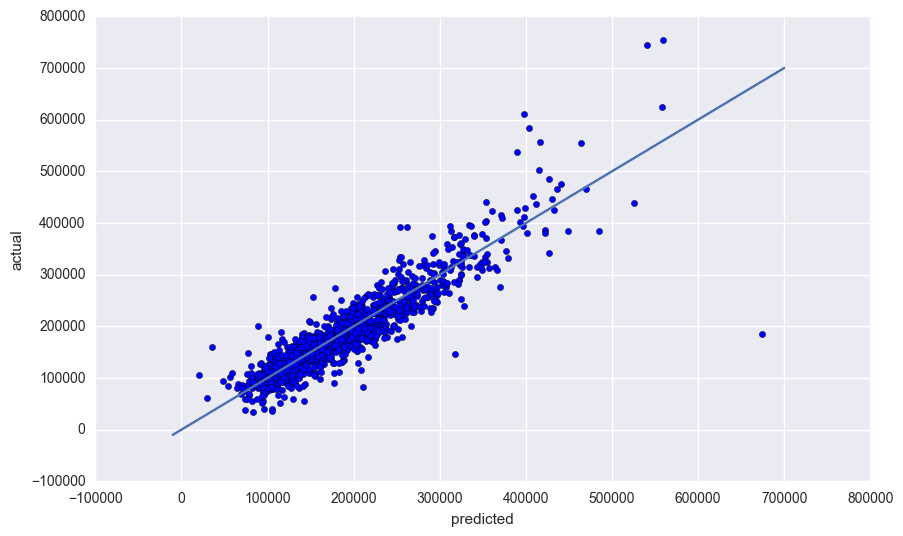

In [58]:
plt.xlabel("predicted")
plt.ylabel("actual")
plt.scatter(predictions, df.SalePrice)
x=np.linspace(-10000, 700000, 10)
plt.plot(x, x)

In [85]:
clf = linear_model.Ridge (alpha = 100)

poly = PolynomialFeatures(degree=2)

#get the new prameters
X_poly = poly.fit_transform(df[parameters])

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = X_poly[train]
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    clf.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = clf.predict(X_poly[test])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [86]:
rmsle(df["SalePrice"], predictions)

0.17120532036193997

In [61]:
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

'for parameter in parameters:\n    plt.scatter(df[parameter], error)\n    plt.xlabel(parameter)\n    plt.show()'

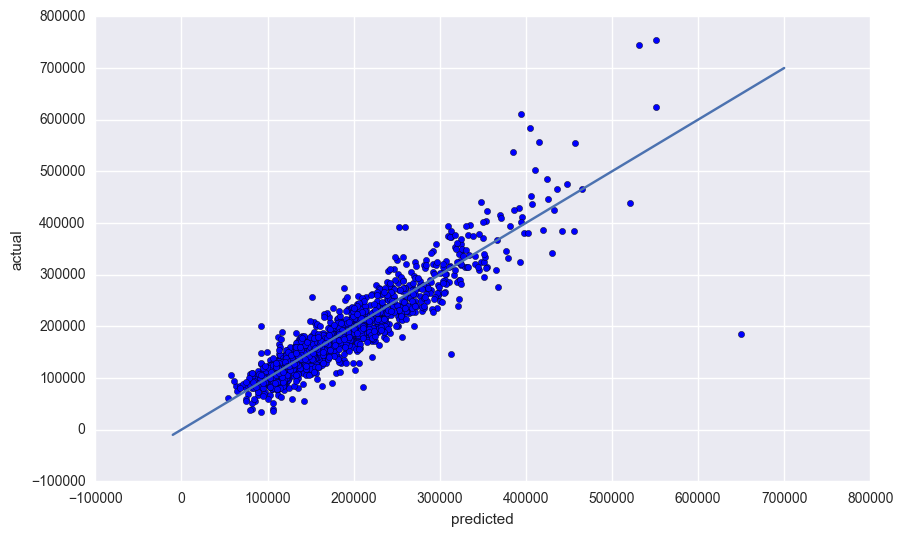

In [62]:
plt.xlabel("predicted")
plt.ylabel("actual")
plt.scatter(predictions, df.SalePrice)
x=np.linspace(-10000, 700000, 10)
plt.plot(x, x)

In [63]:
#Add up all of the bathrooms
df["Total_bathrooms"] = df["BsmtFullBath"] + df["BsmtHalfBath"] + df["FullBath"] + df["HalfBath"]

In [64]:
clf = linear_model.Ridge (alpha = 100)

#get the new prameters
X_poly = poly.fit_transform(df[parameters])

predictions = []
for train, test in kf:
    #we get the index
    train_predictors = X_poly[train]
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    clf.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = clf.predict(X_poly[test])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [65]:
rmsle(df["SalePrice"], predictions)

0.17120532036193997

In [ ]:
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

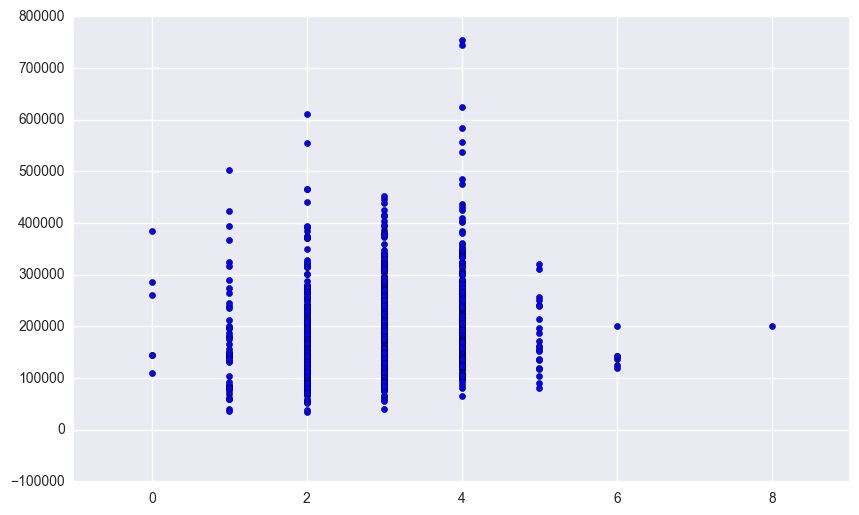

In [66]:
plt.scatter(df.BedroomAbvGr, df.SalePrice)

In [67]:
#Get the log of GrLivArea
df["GrLivArea_log"] = df.apply(lambda x: log(x["GrLivArea"]), axis=1)

In [68]:
#Bedrooms above ground is weird. Use TotRmsAbvGrd

#The parameteres for the fitting model
parameters = ["YearRemodAdd", "LotArea_log", "OverallQual", "Total_bathrooms", "GarageCars",
              "TotRmsAbvGrd", "Neighborhood_id", "SaleCondition_id", "PoolArea"]
    
predictions = []
for train, test in kf:
    #we get the index
    train_predictors = (df[parameters].iloc[train,:])
    #Get the target we're using to train the algorithm
    train_targets = df["SalePrice"].iloc[train]
    #train the algorithm using the predictor and the target
    lr.fit(train_predictors, train_targets)
    #Now make the prediction
    test_predictions = lr.predict(df[parameters].iloc[test,:])
    predictions.append(test_predictions)
    
#We have three different numpy arrays. Concatentate them into one.
predictions = np.concatenate(predictions, axis = 0)

In [69]:
rmsle(df["SalePrice"], predictions)

0.23061389808702862

In [71]:
"""for parameter in parameters:
    plt.scatter(df[parameter], error)
    plt.xlabel(parameter)
    plt.show()"""

'for parameter in parameters:\n    plt.scatter(df[parameter], error)\n    plt.xlabel(parameter)\n    plt.show()'

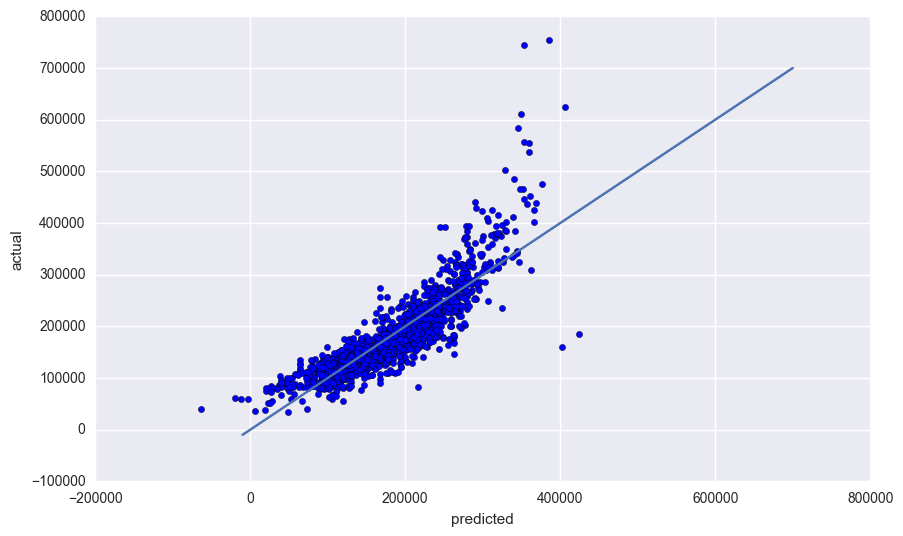

In [72]:
plt.xlabel("predicted")
plt.ylabel("actual")
plt.scatter(predictions, df.SalePrice)
x=np.linspace(-10000, 700000, 10)
plt.plot(x, x)